# 数据处理

按照2：8随机分train&test

In [20]:
import os
import random

# 设置文件夹路径
folder_path = '/code/CZQ/202311/data/all_200'
train_folder_path = '/code/CZQ/202311/data/train/raw'  # 训练集目录路径
test_folder_path = '/code/CZQ/202311/data/test/raw'    # 测试集目录路径

# 获取所有文件夹列表
all_folders = os.listdir(folder_path)

# 随机洗牌文件夹列表
random.shuffle(all_folders)

# 选择前121个文件夹作为训练集
train_folders = all_folders[:121]

# 选择后30个文件夹作为测试集
test_folders = all_folders[121:151]

# 创建训练集和测试集文件夹
os.makedirs(train_folder_path, exist_ok=True)
os.makedirs(test_folder_path, exist_ok=True)

# 移动文件夹到训练集和测试集
for folder in train_folders:
    src_folder = os.path.join(folder_path, folder)
    dest_folder = os.path.join(train_folder_path, folder)
    os.rename(src_folder, dest_folder)

for folder in test_folders:
    src_folder = os.path.join(folder_path, folder)
    dest_folder = os.path.join(test_folder_path, folder)
    os.rename(src_folder, dest_folder)

print("训练集和测试集创建完成。")

训练集和测试集创建完成。


## Section A. 查看未处理的seg_200数据

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

nii_image = nib.load('/tmp/code/brain_seg/data/QJSH025/T1.nii.gz')
nii_data = nii_image.get_fdata()

numpy_array = np.array(nii_data)
numpy_array.shape

(208, 288, 288)

↑原始数据维度

↓可视化，选择中间较有代表性的一个切片查看

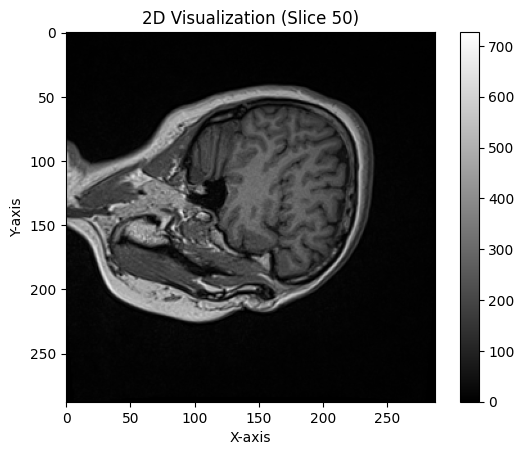

In [3]:
# 选择一个切片的索引
slice_index = 50

# 获取选定切片的数据
slice_data = numpy_array[slice_index, :, :]  # 假设你要选择第 个切片

# 使用Matplotlib创建2D图像，以灰度显示
plt.imshow(slice_data, cmap='gray')  # 使用灰度颜色映射
plt.colorbar()

# 添加标题和标签
plt.title('2D Visualization (Slice {})'.format(slice_index))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 显示图像
plt.show()


↑预期应该是一个后脑勺向上，颈部在左侧的图像

# Section B. 处理Train数据

选取121例train

train切片为2D图像

In [2]:
import os
import nibabel as nib
import numpy as np

# 设置文件夹路径
folder_path_train_raw = '/code/CZQ/202311/data/train/raw'
valid_prefixes = ['CSVD', 'GZHU', 'QJ', 'SZKP']
#folder_num = 10

# 获取文件夹中所有子文件夹的名称
subfolders = os.listdir(folder_path_train_raw)

In [3]:
# 遍历每个子文件夹
ii = 0
for idx, subfolder in enumerate(subfolders):
    # 构建两个文件的完整路径
    if any (subfolder.startswith(prefix) for prefix in valid_prefixes):
        ii += 1
        print(f"--No.{ii} :{subfolder} --")
        
        nii_file1 = os.path.join(folder_path_train_raw, subfolder, 'T1.nii.gz')
        nii_file2 = os.path.join(folder_path_train_raw, subfolder, 'final_tissues.nii.gz')

        # 使用 nibabel 加载文件并提取数据
        img1 = nib.load(nii_file1).get_fdata()
        img2 = nib.load(nii_file2).get_fdata()
        #print(img1.shape)
        # 使用 squeeze 函数消除维度大小为1的维度
        img2 = np.squeeze(img2, axis=(3))
        #现在 imgx 将具有形状 (172, 512, 512)
         ##max - min normalization
        min_value = np.min(img1)
        max_value = np.max(img1)
        img1 = (img1 - min_value) / (max_value - min_value)
        #切片
        # 首先切片成 (512, 512) 的数据
        array_len = len(img1)
        for i in range(array_len):
        # 合并相同索引的切片，得到 (2, 512, 512) 的数据
            merged_slices = np.stack([img1[i], img2[i]], axis=0)
                  
        # 保存数据数组为 .npy 文件
            np.save(f'/code/CZQ/202311/data/train/00/{subfolder}_{i:03}.npy',merged_slices)
    
print('success')


--No.1 :QJGZ018 --
--No.2 :SZKP032 --
--No.3 :QJSH006 --
--No.4 :QJSH011 --
--No.5 :QJHK001 --
--No.6 :QJSH036 --
--No.7 :QJHK003 --
--No.8 :QJCQ001 --
--No.9 :SZKP016 --
--No.10 :QJSH020 --
--No.11 :QJGZ013 --
--No.12 :CSVD003 --
--No.13 :QJSH016 --
--No.14 :SZKP029 --
--No.15 :QJHK010 --
--No.16 :QJHK004 --
--No.17 :QJGZ023 --
--No.18 :QJGZ012 --
--No.19 :QJGZ031 --
--No.20 :QJHK005 --
--No.21 :QJSH030 --
--No.22 :SZKP028 --
--No.23 :SZKP001 --
--No.24 :QJSH018 --
--No.25 :QJSH017 --
--No.26 :QJGZ020 --
--No.27 :QJGZ008 --
--No.28 :QJGZ016 --
--No.29 :QJSH003 --
--No.30 :QJHK002 --
--No.31 :QJGZ014 --
--No.32 :SZKP020 --
--No.33 :QJSH022 --
--No.34 :CSVD008 --
--No.35 :QJSH028 --
--No.36 :QJSH049 --
--No.37 :QJGZ011 --
--No.38 :GZHU005 --
--No.39 :QJGZ003 --
--No.40 :QJGZ017 --
--No.41 :QJSH019 --
--No.42 :QJGZ010 --
--No.43 :QJSH052 --
--No.44 :QJGZ021 --
--No.45 :QJGZ025 --
--No.46 :QJSH041 --
--No.47 :QJGZ028 --
--No.48 :QJSH042 --
--No.49 :SZKP018 --
--No.50 :QJSH001 --
--No.51 :

## 检查处理后的数据

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 读取.npy文件
data = np.load('/code/CZQ/202311/data/train/00/QJGZ015_111.npy')
#data1 = np.load('/code/CZQ/202300/000/train/QJGZ015_111.npy')
print(data.shape)
#np.unique(data[1])
#print(data1)

(2, 256, 256)


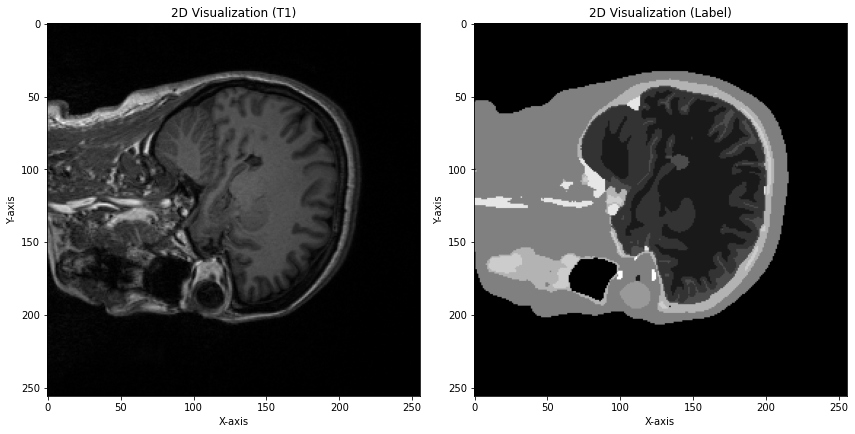

In [8]:
# 获取切片0和切片1的数据
slice_data_0 = data[0, :, :]
slice_data_1 = data[1, :, :]

# 创建一个包含两个子图的图形
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 在第一个子图中显示切片0的数据
ax1.imshow(slice_data_0, cmap='gray')
ax1.set_title('2D Visualization (T1)')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')

# 在第二个子图中显示切片1的数据
ax2.imshow(slice_data_1, cmap='gray')
ax2.set_title('2D Visualization (Label)')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')

# 显示图形
plt.tight_layout()
plt.show()

In [19]:
### QJSH033的不能要

import os

# 指定目录
directory = "/tmp/code/brain_seg/data00/train/00"

# 获取目录下所有文件
files = os.listdir(directory)

# 遍历文件，删除以"QJSH033"开头的文件
for file in files:
    if file.startswith("QJSH033"):
        file_path = os.path.join(directory, file)
        os.remove(file_path)
        print(f"Deleted file: {file_path}")

Deleted file: /tmp/code/brain_seg/data00/train/00/QJSH033_188.npy
Deleted file: /tmp/code/brain_seg/data00/train/00/QJSH033_043.npy
Deleted file: /tmp/code/brain_seg/data00/train/00/QJSH033_158.npy
Deleted file: /tmp/code/brain_seg/data00/train/00/QJSH033_065.npy
Deleted file: /tmp/code/brain_seg/data00/train/00/QJSH033_096.npy
Deleted file: /tmp/code/brain_seg/data00/train/00/QJSH033_071.npy
Deleted file: /tmp/code/brain_seg/data00/train/00/QJSH033_151.npy
Deleted file: /tmp/code/brain_seg/data00/train/00/QJSH033_046.npy
Deleted file: /tmp/code/brain_seg/data00/train/00/QJSH033_209.npy
Deleted file: /tmp/code/brain_seg/data00/train/00/QJSH033_178.npy
Deleted file: /tmp/code/brain_seg/data00/train/00/QJSH033_141.npy
Deleted file: /tmp/code/brain_seg/data00/train/00/QJSH033_155.npy
Deleted file: /tmp/code/brain_seg/data00/train/00/QJSH033_221.npy
Deleted file: /tmp/code/brain_seg/data00/train/00/QJSH033_044.npy
Deleted file: /tmp/code/brain_seg/data00/train/00/QJSH033_246.npy
Deleted fi

# Section C. 处理Test数据

test仍保持为3D图像

In [6]:
import os
import nibabel as nib
import numpy as np
# 设置文件夹路径
folder_path_test_raw = '/code/CZQ/202311/data/test/raw'
#folder_num = 10
valid_prefixes = ['CSVD', 'GZHU', 'QJ', 'SZKP']
# 获取文件夹中所有子文件夹的名称
subfolders = os.listdir(folder_path_test_raw)

In [9]:
# 遍历每个子文件夹
i = 0
for idx, subfolder in enumerate(subfolders):
    # 构建两个文件的完整路径
    if any (subfolder.startswith(prefix) for prefix in valid_prefixes):
        i += 1
        print(f"--No.{i} :{subfolder} --")
        nii_file1 = os.path.join(folder_path_test_raw, subfolder, 'T1.nii.gz')
        nii_file2 = os.path.join(folder_path_test_raw, subfolder, 'final_tissues.nii.gz')
        # 使用 nibabel 加载文件并提取数据
        img1 = nib.load(nii_file1).get_fdata()
        img2 = nib.load(nii_file2).get_fdata()
        #print(img1.shape)
        # 使用 squeeze 函数消除维度大小为1的维度
        img2 = np.squeeze(img2, axis=(3))
        #现在 imgx 将具有形状 (172, 512, 512)
        min_value = np.min(img1)
        max_value = np.max(img1)
        img1 = (img1 - min_value) / (max_value - min_value)
        #切片
        # 首先切片成 (512, 512) 的数据
        #array_len = len(img1)
        #for i in range(array_len):
        # 合并相同索引的切片，得到 (2, 512, 512) 的数据
        merged_slices = np.stack((img1, img2), axis=0)
        #np.shape(merged_slices)
        # 保存数据数组为 .npy 文件
        np.save(f'/code/CZQ/202311/data/test/00/{subfolder}.npy',merged_slices) 
print('success')

--No.1 :SZKP002 --
--No.2 :QJSH024 --
--No.3 :QJSH031 --
--No.4 :QJSH032 --
--No.5 :SZKP005 --
--No.6 :CSVD004 --
--No.7 :QJSH027 --
--No.8 :QJSH014 --
--No.9 :QJSH013 --
--No.10 :QJGZ006 --
--No.11 :QJGZ022 --
--No.12 :QJSH008 --
--No.13 :QJGZ005 --
--No.14 :QJGZ019 --
--No.15 :SZKP019 --
--No.16 :QJSH002 --
--No.17 :QJGZ009 --
--No.18 :GZHU006 --
--No.19 :SZKP011 --
--No.20 :QJGZ029 --
--No.21 :QJSH025 --
--No.22 :SZKP007 --
--No.23 :SZKP025 --
--No.24 :QJGZ030 --
--No.25 :QJGZ026 --
--No.26 :GZHU003 --
--No.27 :QJHK009 --
--No.28 :SZKP026 --
--No.29 :QJSH012 --
--No.30 :SZKP015 --
success


## 检查处理后的数据